In [1]:
from heron import data
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
bbh_text = np.genfromtxt("/home/daniel/data/imrphenom-test/bbh_mass1_only_hp.txt", delimiter=" ")
bbh_test = np.genfromtxt("/home/daniel/data/imrphenom-test/bbh_mass1_only_hp_TEST.txt", delimiter=" ")

In [3]:
bbh = data.Data(bbh_text[:,:2], bbh_text[:,2],              
                    target_names = ["Times", "Mass Ratio"],
                    label_names = ["hp strain"],
                    test_size = 0,
                    test_targets = bbh_test[:,:2],
                    test_labels = bbh_test[:,2]
                    )

In [4]:
from heron import regression
from heron import kernels

In [9]:
x0 = [(1/np.std(bbh.labels))**2, 50, 10]
gp = regression.Regressor(bbh, kernel=kernels.SquaredExponential(ndim=2), yerror = 1e-23, tikh=1e-6)
gp.set_hyperparameters(x0)

-1074.3195582790199

In [10]:
x0 = [ 32.57270317,  48.53372059,   5.16764146]
#x0 = [0.029974254529549851,  101.2117402 ,    0.84988828]
gp.set_hyperparameters(x0)

-107.72317755230885

In [83]:
gp.optimise()

/home/daniel/.virtualenvs/heron/local/lib/python2.7/site-packages/heron-0.1.0-py2.7.egg/heron/kernels.py:20: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


      fun: -1421.9772103270525
 hess_inv: array([[  1.00006016e+00,   8.56476128e-03,   1.13987998e-03],
       [  8.56476128e-03,   1.99055511e+00,   2.70113292e-01],
       [  1.13987998e-03,   2.70113292e-01,   2.69813720e-01]])
      jac: array([ 0.04027393,  4.2434951 ,  4.06960679])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 85
      nit: 2
     njev: 73
   status: 2
  success: False
        x: array([ 32.55510883,  46.72474704,   2.48678814])

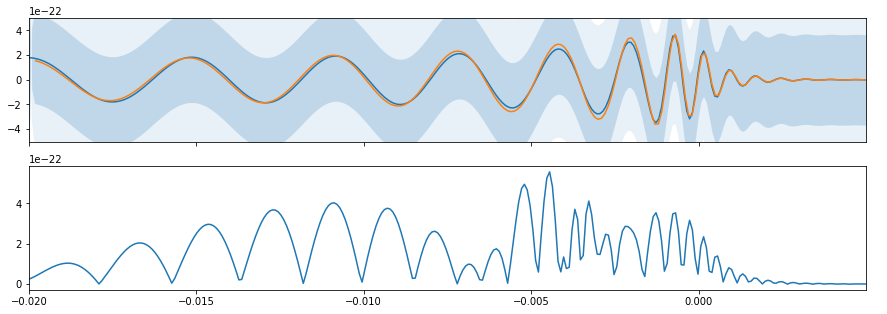

In [85]:
test = np.genfromtxt('/home/daniel/data/imrphenom-test/bbh_mass1_only_hp_test_7d85.txt')
f, ax = plt.subplots(2,1, sharey=False, sharex=True, figsize=(15,5))

t = np.linspace(-0.02,0.005,300)
new_point = np.atleast_2d(bbh.targets[test_point])
new_point = np.tile(new_point, (300,1))
new_point[:,1] = 7.85
new_point[:,0] = t
pred = gp.prediction(new_point)
ax[0].plot(t, pred[0])
ax[0].set_ylim([-.5e-21, .5e-21])
ax[0].set_xlim([-0.02, 0.005])
err = np.diag(pred[1])
err2 = err*1.96
ax[0].fill_between(t, pred[0] - err, pred[0] + err , alpha = 0.2)
ax[0].fill_between(t, pred[0] - err2, pred[0] + err2 , alpha = 0.1)
d = test.T[0][1] - test.T[0][0]
ax[0].plot(test.T[0]+d, test.T[2])
ax[1].plot(t, np.sqrt((test.T[2] - pred[0])**2))

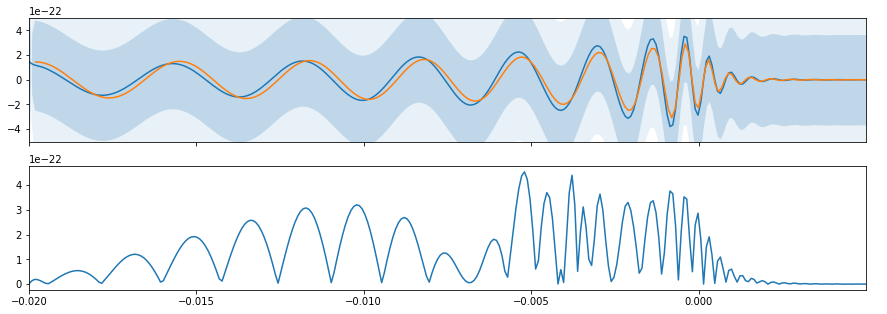

In [93]:
test = np.genfromtxt('/home/daniel/data/imrphenom-test/bbh_mass1_only_hp_test_5d20.txt')
f, ax = plt.subplots(2,1, sharey=False, sharex=True, figsize=(15,5))

t = np.linspace(-0.02,0.005,300)
new_point = np.atleast_2d(bbh.targets[test_point])
new_point = np.tile(new_point, (300,1))
new_point[:,1] = 5.20
new_point[:,0] = t
pred = gp.prediction(new_point)
ax[0].plot(t, pred[0])
ax[0].set_ylim([-.5e-21, .5e-21])
ax[0].set_xlim([-0.02, 0.005])
err = np.diag(pred[1])
err2 = err*1.96
ax[0].fill_between(t, pred[0] - err, pred[0] + err , alpha = 0.2)
ax[0].fill_between(t, pred[0] - err2, pred[0] + err2 , alpha = 0.1)
d = test.T[0][1] - test.T[0][0]
ax[0].plot(test.T[0]+d, test.T[2])
ax[1].plot(t, np.sqrt((test.T[2] - pred[0])**2))

In [84]:
np.sqrt(np.mean((test.T[2] - pred[0])**2))

1.5972211798443853e-22